## Daily Challenge: Analyzing The IMDB Movie Dataset With Matplotlib And Seaborn

1. Load and Inspect Data:

Use pandas to load the IMDB Movie Dataset.

Inspect the data to understand its structure and contents.

In [63]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=4c16e603079c7b1a692d2ff44aa02572b58d921df4ca67f17d5e243eafadfa39
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors

In [42]:
# Load data from a CSV file
df = pd.read_csv(r'/content/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [43]:
# Remove unnecessary columns
df.drop (["Poster_Link", "Overview"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


2. Data Preprocessing:

Handle missing values and convert data types as needed.

In [44]:
# Check for missing values in the dataset
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [45]:
df.isna()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [46]:
df.dropna(subset = ['Certificate', 'Meta_score', 'Gross'],inplace = True)
df.dropna(inplace = True)

In [47]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [48]:
# Check for data types

df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [49]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype('float64')

df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [72]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '1981', '1979',
       '1964', '2004', '1992', '1987', '1986', '1984', '1983', '1976',
       '1973', '1971', '1965', '1962', '1959', '1958', '1952', '1944',
       '1941', '2013', '2007', '2005', '1989', '1963', '1950', '1948',
       '2015', '1996', '1982', '1978', '1967', '1951', '1949', '1940',
       '1939', '1934', '1970', '1969', '1961', '1946', '1930', '1938',
       '1933', 'PG', '1953'], dtype=object)

In [73]:
df[df['Released_Year']=='PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [74]:
df['Released_Year'].replace({'PG':'1995'}, inplace =True)

In [75]:
df['Released_Year'] = pd.to_datetime(df['Released_Year'])

In [76]:
df.dtypes

Series_Title             object
Released_Year    datetime64[ns]
Certificate              object
Runtime                  object
Genre                    object
IMDB_Rating             float64
Meta_score              float64
Director                 object
Star1                    object
Star2                    object
Star3                    object
Star4                    object
No_of_Votes               int64
Gross                   float64
dtype: object

3. Rating Trends Over Years:

Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.

In [77]:
year_rating = df.groupby('Released_Year', as_index = False).agg({'IMDB_Rating':'median'})

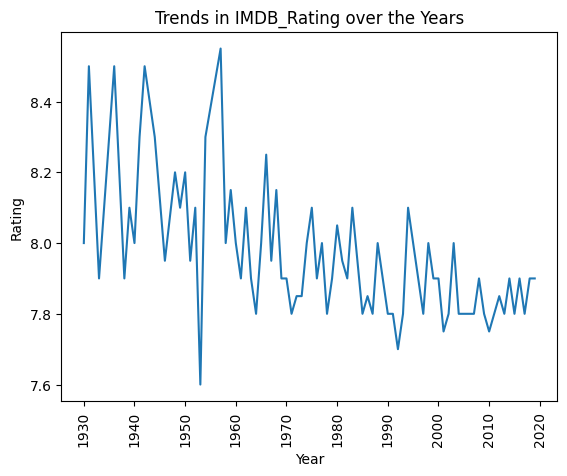

In [80]:
plt.plot(year_rating['Released_Year'], year_rating['IMDB_Rating'])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Trends in IMDB_Rating over the Years')

plt.show()


4. Genre Popularity Analysis:

Generate a Seaborn bar plot to compare the number of movies across different genre

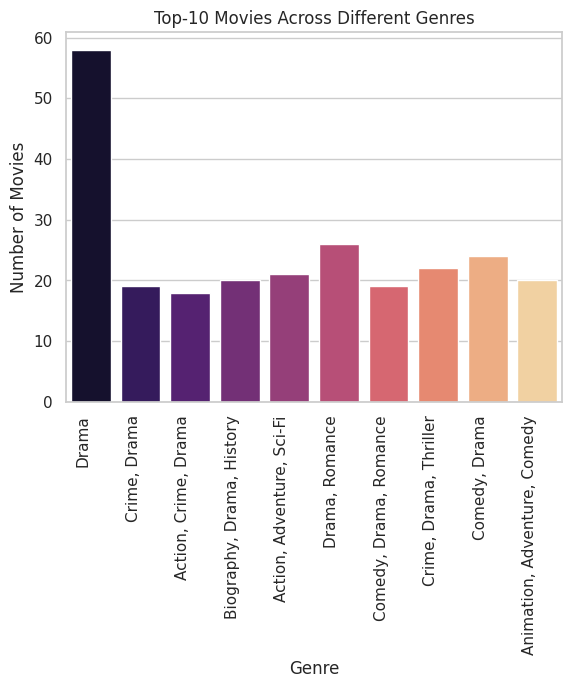

In [93]:
top_genres = df['Genre'].value_counts().nlargest(10).index

filtered_df = df[df['Genre'].isin(top_genres)]

sns.countplot(x='Genre', data=filtered_df, palette='magma')

plt.xticks(rotation=90, ha='right')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top-10 Movies Across Different Genres')

plt.show()

5. Director’s Impact on Ratings:

Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.

In [101]:
rating_by_director = df.groupby('Director', as_index=False).agg({'IMDB_Rating':'mean'}).head(30)

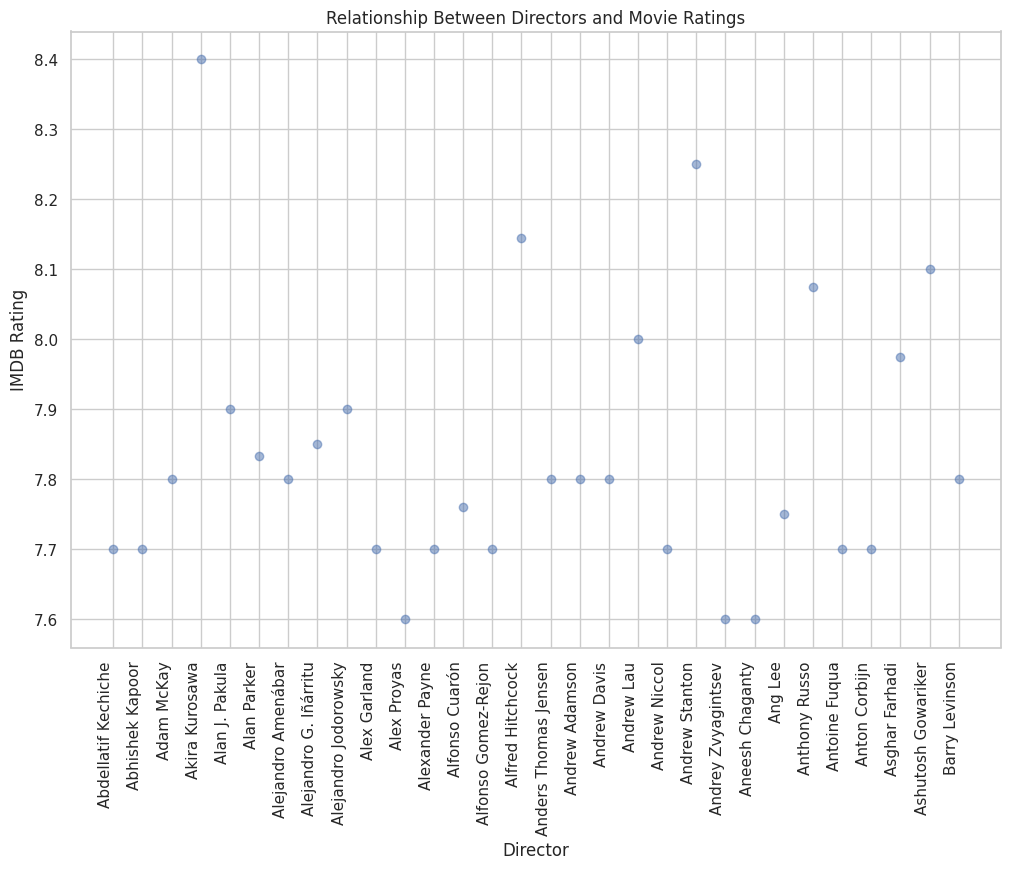

In [103]:
plt.figure(figsize=(12, 8))
plt.scatter(rating_by_director['Director'], rating_by_director['IMDB_Rating'], alpha=0.5)

plt.xticks(rotation=90, ha='right')
plt.xlabel('Director')
plt.ylabel('IMDB Rating')

plt.title('Relationship Between Directors and Movie Ratings')

plt.show()

6. Star Power Analysis:

Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.

In [114]:
star_df = df.groupby('Star1', as_index=False).agg({'IMDB_Rating':'mean','Gross':'mean'}).sort_values('IMDB_Rating', ascending =False).head(25)

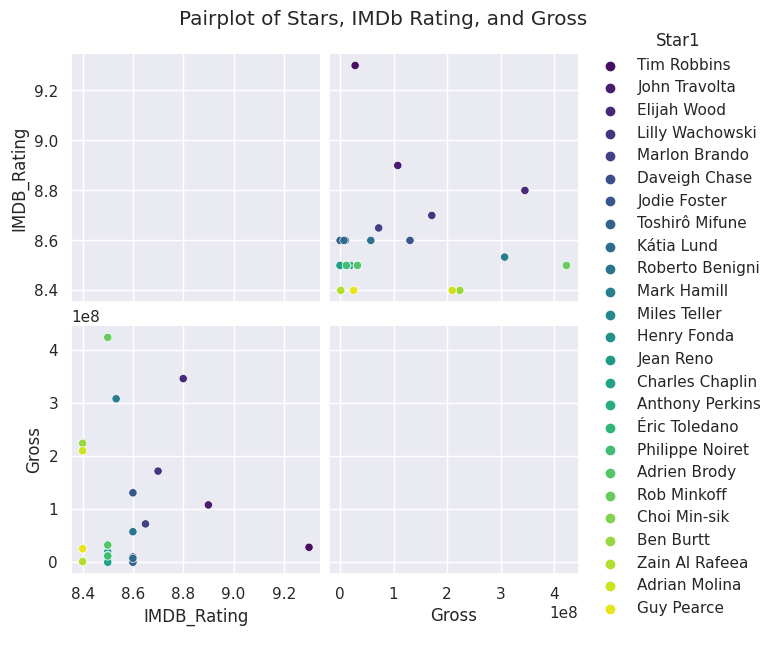

In [117]:
# Create a pairplot using Seaborn
sns.set(style="darkgrid")
sns.pairplot(star_df, hue='Star1', height=3, markers='o', palette='viridis')

# Adding a title to the plot
plt.suptitle('Pairplot of Stars, IMDb Rating, and Gross', y=1.05)

# Display the plot
plt.show()

7. Box Plot of Genres vs. Ratings:

Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.

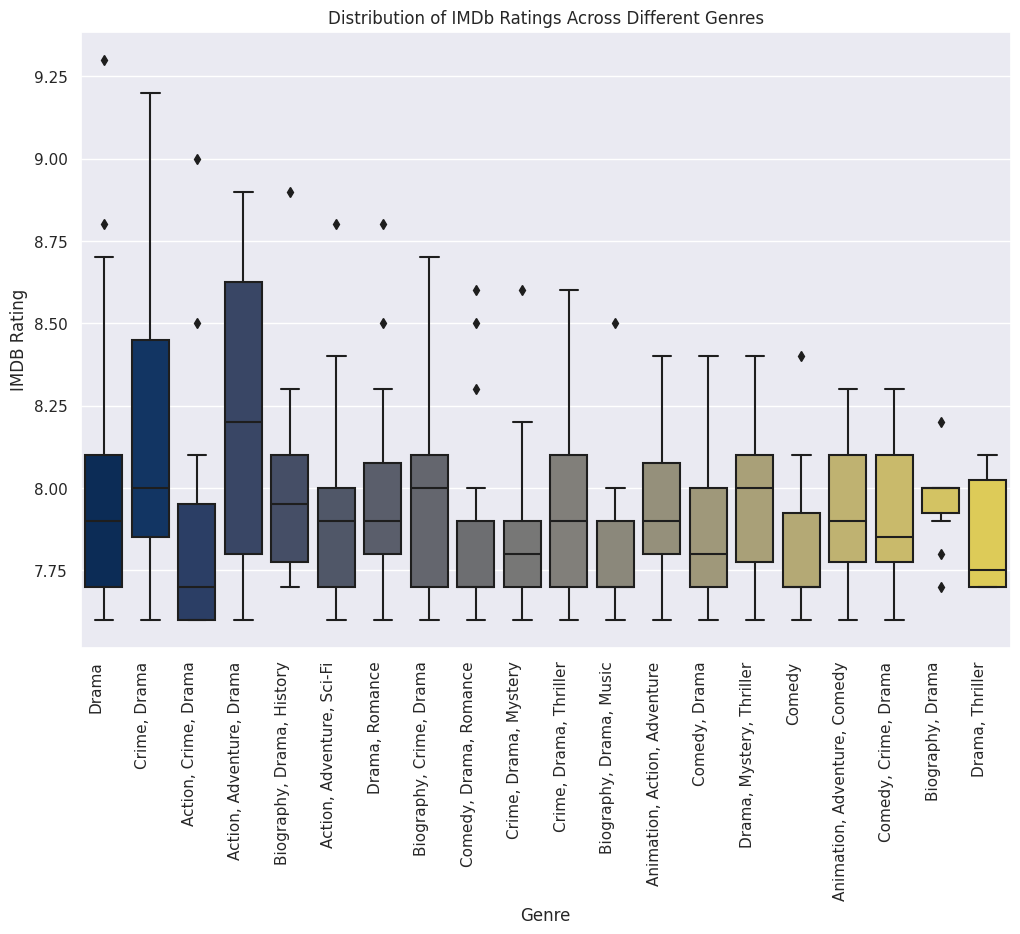

In [124]:
top_genres = df['Genre'].value_counts().nlargest(20).index
filtered_df = df[df['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='IMDB_Rating', data=filtered_df, palette='cividis')

plt.xticks(rotation=90, ha='right')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.title('Distribution of IMDb Ratings Across Different Genres')

plt.show()

8. Correlation Heatmap:

Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.

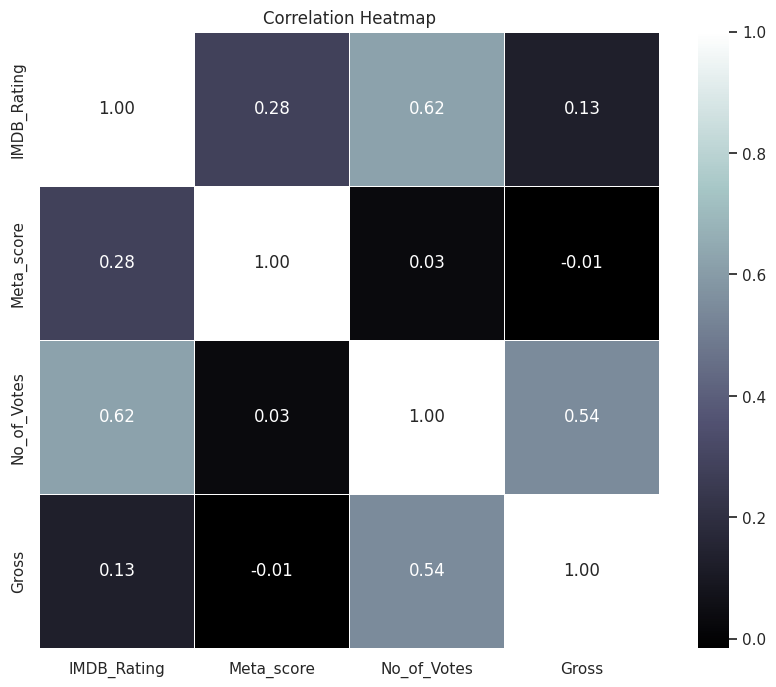

In [131]:
correlation_matrix = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bone', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()